### Import packages

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
from random import random
import matplotlib.pyplot as plt

pd.options.display.max_rows = 200

### Get data

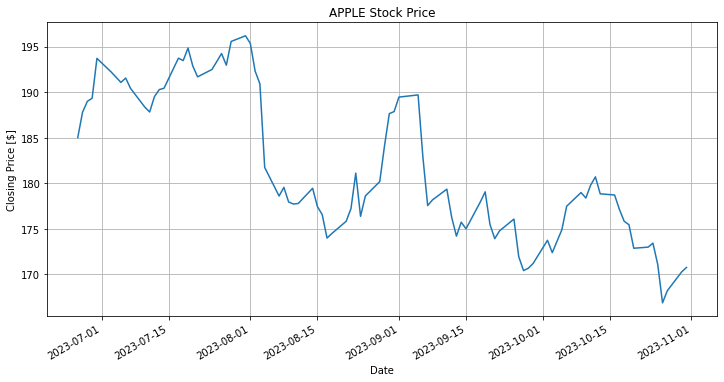

In [55]:

# Obtaining Historical Market Data
#'2023-06-26' - specified data format
def get_data(ticker, start_date, end_date):
    ticker = yf.Ticker(str(ticker))
    start_date = str(start_date)
    end_date = str(end_date)
    data = ticker.history(start=start_date, end=end_date)
    df = data
    return df



df = get_data("AAPL",'2023-06-26','2023-11-01')


# Plotting Price Data
def plot(df):
    df = df[["Close"]]
    df['Close'].plot(title="APPLE Stock Price", ylabel=
                   "Closing Price [$]", figsize=[12, 6])
    plt.grid()
    

    
plot(df)

### Exploratory Data Analysis

In [29]:
# Side not: df.shape is not a function or method -> ITS AN ATTRIBUTE
df.shape
df.dtypes
df.columns
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.0
mean,181.509759,183.050431,180.017280,181.484487,5.678072e+07,0.002667,0.0
std,8.108132,7.967083,8.190305,8.027778,1.573828e+07,0.025298,0.0
min,166.910004,168.960007,165.669998,166.889999,3.145820e+07,0.000000,0.0
25%,175.212494,177.135002,173.830006,175.467506,4.681358e+07,0.000000,0.0
50%,179.248974,180.185005,177.324997,178.785004,5.261990e+07,0.000000,0.0
75%,189.319338,189.964996,188.263958,189.500565,6.080905e+07,0.000000,0.0
max,195.975362,197.962667,195.016650,196.185074,1.157997e+08,0.240000,0.0


### Data preparation

In [59]:
df = df.copy() #.copy = it important because it tells python its a new data frame and not a reference to the old one

# Drop columns
# df.drop(["Open"], axis=1) -> axis=1 tells it its a column
#df["Date"] = pd.to_datetime(df["Date"])
#df = df.drop(["Dividends", "Stock Splits"], axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-26 00:00:00-04:00,186.578051,187.796407,184.980202,185.020157,48088700
2023-06-27 00:00:00-04:00,185.639310,188.135938,185.419605,187.806381,50730800
2023-06-28 00:00:00-04:00,187.676554,189.643899,187.347013,188.994781,51216800
2023-06-29 00:00:00-04:00,188.825013,189.813684,188.685203,189.334320,46347300
2023-06-30 00:00:00-04:00,191.371579,194.217727,191.002068,193.708420,85069600


#### Rename columns

In [61]:
df = df.rename(columns={"Close": "Geschlossen"})
df.head()

,Open,High,Low,Geschlossen,Volume
Date,,,,,
2023-06-26 00:00:00-04:00,186.578051,187.796407,184.980202,185.020157,48088700
2023-06-27 00:00:00-04:00,185.639310,188.135938,185.419605,187.806381,50730800
2023-06-28 00:00:00-04:00,187.676554,189.643899,187.347013,188.994781,51216800
2023-06-29 00:00:00-04:00,188.825013,189.813684,188.685203,189.334320,46347300
2023-06-30 00:00:00-04:00,191.371579,194.217727,191.002068,193.708420,85069600


#### Missing values and duplicates

In [70]:
df.isna().sum()
df.loc[df.duplicated()] #filters for values which are duplicated
df.duplicated() #shows only the duplicated

Date
2023-06-26 00:00:00-04:00    False
2023-06-27 00:00:00-04:00    False
2023-06-28 00:00:00-04:00    False
2023-06-29 00:00:00-04:00    False
2023-06-30 00:00:00-04:00    False
2023-07-03 00:00:00-04:00    False
2023-07-05 00:00:00-04:00    False
2023-07-06 00:00:00-04:00    False
2023-07-07 00:00:00-04:00    False
2023-07-10 00:00:00-04:00    False
2023-07-11 00:00:00-04:00    False
2023-07-12 00:00:00-04:00    False
2023-07-13 00:00:00-04:00    False
2023-07-14 00:00:00-04:00    False
2023-07-17 00:00:00-04:00    False
2023-07-18 00:00:00-04:00    False
2023-07-19 00:00:00-04:00    False
2023-07-20 00:00:00-04:00    False
2023-07-21 00:00:00-04:00    False
2023-07-24 00:00:00-04:00    False
2023-07-25 00:00:00-04:00    False
2023-07-26 00:00:00-04:00    False
2023-07-27 00:00:00-04:00    False
2023-07-28 00:00:00-04:00    False
2023-07-31 00:00:00-04:00    False
2023-08-01 00:00:00-04:00    False
2023-08-02 00:00:00-04:00    False
2023-08-03 00:00:00-04:00    False
2023-08-04 00:0

#### Query

In [79]:
# Checking for certain value
df.query('Volume > 70000000') #column and then value searched

# interesting way to remove duplicates for columns
#df = df.loc[~df.duplicated(subset=["Column_name", "Column_name_2"])].reset_index(drop=True).copy()

,Open,High,Low,Geschlossen,Volume
Date,,,,,
2023-06-30 00:00:00-04:00,191.371579,194.217727,191.002068,193.708420,85069600
2023-07-19 00:00:00-04:00,192.839596,197.962667,192.390191,194.836899,80507300
2023-07-21 00:00:00-04:00,193.838258,194.707080,190.972118,191.681168,71917800
2023-08-04 00:00:00-04:00,185.269822,187.127314,181.674670,181.744583,115799700
2023-08-07 00:00:00-04:00,181.884386,182.883037,177.110833,178.608810,97576100
2023-09-06 00:00:00-04:00,188.399994,188.850006,181.470001,182.910004,81755800
2023-09-07 00:00:00-04:00,175.179993,178.210007,173.539993,177.559998,112488800
2023-09-12 00:00:00-04:00,179.490005,180.130005,174.820007,176.300003,90370200
2023-09-13 00:00:00-04:00,176.509995,177.300003,173.979996,174.210007,84267900


### LINEAR REGRESSION MODEL

In [46]:
from sklearn.linear_model import LinearRegression

df = data

df["% change"] = df.Close.pct_change() * 100
df["Day"] = np.arange(len(df))

print(np.arange(len(df)))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [45]:
# Training data
X = df.loc[:, ['Day']]  # features
y = df.loc[:, 'Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

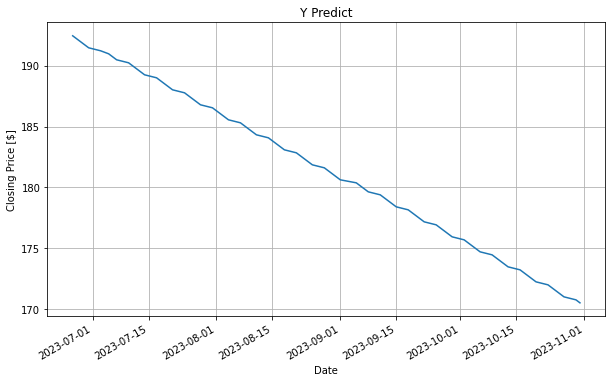

In [44]:
#Plot the prediction
y_pred.plot(title="Y Predict", ylabel=
                   "Closing Price [$]", figsize=[10, 6])
plt.grid()

                                 Open        High         Low       Close  \
Date                                                                        
2023-06-26 00:00:00-04:00  168.440216  169.917058  166.963375  167.083115   
2023-06-27 00:00:00-04:00  167.751684  170.765252  167.592022  170.376083   
2023-06-28 00:00:00-04:00  169.428096  171.393898  169.298383  170.475861   
2023-06-29 00:00:00-04:00  170.655483  171.084560  169.747419  170.775223   
2023-06-30 00:00:00-04:00  172.471595  173.928490  172.341883  173.489426   

                            Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                        
2023-06-26 00:00:00-04:00  5445100        0.0           0.0            0.0  
2023-06-27 00:00:00-04:00  6916500        0.0           0.0            0.0  
2023-06-28 00:00:00-04:00  5685800        0.0           0.0            0.0  
2023-06-29 00:00:00-04:00  4564100        0.0           0.0            0.0 

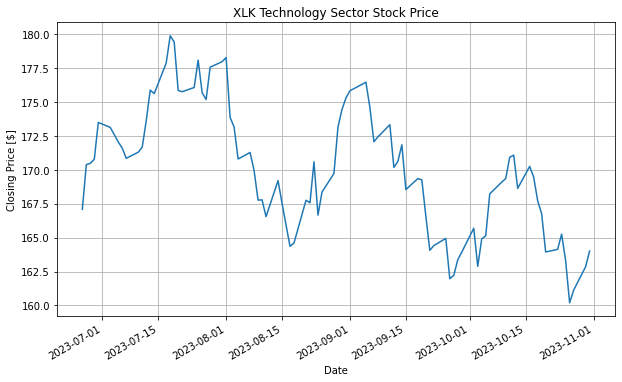

In [50]:
# Define the ticker - APPL stands for the APPLE stock
ticker = yf.Ticker('XLK')

# Obtaining Historical Market Data
start_date = '2023-06-26'
end_date = '2023-11-01'
hist = ticker.history(start=start_date, end=end_date)
print(hist.head())

#Creating a general data frame
data = hist

# Pulling Closing Price Data
hist = hist[['Close']]
print(hist)

# Plotting Price Data
hist['Close'].plot(title="XLK Technology Sector Stock Price", ylabel=
                   "Closing Price [$]", figsize=[10, 6])
plt.grid()

### Export Apple Data

In [30]:
#df = data
#df.to_csv("../data/apple_data.csv")

### Export XLK Data

In [54]:
#df = data
#df.to_csv("../data/xlk_technology_sector.csv")

90